In [2]:
pip install pdfcrowd

Note: you may need to restart the kernel to use updated packages.


In [55]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
import io
import base64
import pdfcrowd

In [56]:
name_basics = pd.read_csv("name.basics.tsv",sep="\t")
title_basics = pd.read_csv("title.basics.tsv",sep="\t")
title_ratings = pd.read_csv("title.ratings.tsv",sep="\t")

C:\Users\cgm\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [57]:
basics = title_basics[title_basics["startYear"] != "\\N"]
basics = basics.astype({"startYear":"int"})

In [58]:
basics.dtypes

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           object
startYear          int32
endYear           object
runtimeMinutes    object
genres            object
dtype: object

In [59]:
ratings_merged = pd.merge(basics,title_ratings,on="tconst")

In [60]:
ratings_merged.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1702
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.1,210
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1462
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",6.2,123
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2262


# Find the 20 most popular movies with a rank more than 8.0

In [61]:
ratings_rank_8 = ratings_merged[ratings_merged["averageRating"] >= 8.0]

In [62]:
ratings_movies_20 = ratings_rank_8[ratings_rank_8['titleType'] == "movie"]

In [63]:
rating_movies_20 = ratings_movies_20.sort_values(by=["averageRating"],ascending=False)

In [64]:
rating_movies_20.head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
1133897,tt9233514,movie,Triple Threat,Triple Threat,0,2020,\N,99,"Comedy,Drama",10.0,5
109826,tt0160316,movie,Girls Loving Girls,Girls Loving Girls,1,1996,\N,60,Adult,10.0,5
553796,tt12459016,movie,Cleeve Concerts - Kim Cypher,Cleeve Concerts - Kim Cypher,0,2019,\N,90,Music,10.0,7
619932,tt14316122,movie,Beyond Sixty,Beyond Sixty,0,2021,\N,77,Documentary,10.0,7
473469,tt10663998,movie,Widow of the Revolution: The Anna Larina Story,Widow of the Revolution: The Anna Larina Story,0,2000,\N,\N,Documentary,10.0,6
801689,tt2852640,movie,A Doctor of My Own: The First Medical Students...,A Doctor of My Own: The First Medical Students...,0,2014,\N,51,"Documentary,History,News",10.0,12
452098,tt10233504,movie,Abbas Abbas Send Help!,Abbas Abbas Send Help!,0,2018,\N,86,"Drama,Romance,War",10.0,6
609189,tt13961618,movie,The Lifebelt,The Lifebelt,0,2020,\N,83,Drama,10.0,22
588933,tt1338619,movie,Impedimento,Impedimento,0,2008,\N,85,Drama,10.0,5
569981,tt12892860,movie,Slow Dance,Slow Dance,0,2020,\N,\N,Drama,10.0,7


# Find the 20 best rated movies with over 40,000 votes in the 2000s (year >= 2000)


In [65]:
votes_40k = ratings_merged[(ratings_merged["numVotes"] >= 40000) & (ratings_merged["startYear"] >= 2000) & (ratings_merged["titleType"] == "movie")]

In [66]:
votes_40k = votes_40k.sort_values(by=["averageRating"],ascending=False)

In [67]:
votes_40k["primaryTitle"].head(20)

785303                                CM101MMXI Fundamentals
449967                                       Soorarai Pottru
247830                                       The Dark Knight
113350         The Lord of the Rings: The Return of the King
602418                                             Inception
89775      The Lord of the Rings: The Fellowship of the Ring
977585                                       The Mountain II
113351                 The Lord of the Rings: The Two Towers
390762                                          Interstellar
185014                                           City of God
1029153                                             Parasite
150074                                         Spirited Away
617920                                                 Senna
115791                                             Gladiator
1106203                                             Hamilton
784737                                              Whiplash
153733                  

# Analysis

In [68]:
import pandas as pd 
import numpy as np
import re
from matplotlib import pyplot as plt

# Using the IMDb Movie Rating Data 

In [69]:
title_basics = pd.read_csv("title.basics.tsv",sep="\t")
title_ratings = pd.read_csv("title.ratings.tsv",sep="\t")

C:\Users\cgm\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Convert it into a CSV file

In [70]:
title_basics.to_csv("title.basics.csv")
title_ratings.to_csv("title.ratings.csv")

In [71]:
title_basics.dtypes

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           object
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object

In [72]:
title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [73]:
title_basics["runtimeMinutes"] = pd.to_numeric(title_basics["runtimeMinutes"],errors="coerce")
title_basics["startYear"] = pd.to_numeric(title_basics["startYear"],errors="coerce")
title_basics["endYear"] = pd.to_numeric(title_basics["endYear"],errors="coerce")
title_basics = title_basics.astype({"isAdult":bool})

In [74]:
movies = ratings_merged[ratings_merged["titleType"] == "movie"]
movies

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
340,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.5,8
374,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.1,635
383,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,5.2,6
398,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama,4.5,14
406,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama,3.8,12
...,...,...,...,...,...,...,...,...,...,...,...
1153783,tt9916190,movie,Safeguard,Safeguard,0,2020,\N,90,"Action,Adventure,Thriller",3.5,139
1153789,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,\N,84,Thriller,5.8,1056
1153792,tt9916362,movie,Coven,Akelarre,0,2020,\N,92,"Adventure,Drama,History",6.3,3255
1153795,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,\N,\N,"Adventure,History,War",3.8,12


# Find the average rank of the 10 most popular movies between 2000-2009 (inclusive)

In [75]:
movies_2000_2009 = movies[(movies["startYear"] >= 2000) & (movies["startYear"] <= 2009)]
movies_2000_2009 = movies_2000_2009.sort_values(by=["averageRating"],ascending=False)
movies_2000_2009.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
588933,tt1338619,movie,Impedimento,Impedimento,0,2008,\N,85,Drama,10.0,5
473469,tt10663998,movie,Widow of the Revolution: The Anna Larina Story,Widow of the Revolution: The Anna Larina Story,0,2000,\N,\N,Documentary,10.0,6
613778,tt14106898,movie,Meu Melhor Amigo,Meu Melhor Amigo,0,2006,\N,\N,Drama,10.0,6
804437,tt2906986,movie,Pimpalation: Return of the Trill,Pimpalation: Return of the Trill,0,2006,\N,60,"Documentary,Music",9.8,5
581974,tt1320229,movie,L'aria del lago,L'aria del lago,0,2007,\N,104,"Drama,History,War",9.8,5
236405,tt0439217,movie,Indocumentados,Indocumentados,0,2004,\N,89,Drama,9.8,10
618971,tt1427969,movie,The Lost Spirits,The Lost Spirits,0,2009,\N,70,Documentary,9.8,5
247890,tt0468742,movie,Gachapon,Gachapon,0,2004,\N,124,Drama,9.8,5
532190,tt1192418,movie,Kunku Zale Vairi,Kunku Zale Vairi,0,2005,\N,150,Drama,9.7,6
440147,tt0997212,movie,Cafe Coexistence,Cafe Coexistence,0,2009,\N,68,"Comedy,Drama",9.7,7


# Find the year in the 1900s when the average rank increased the most, compared to the previous year. (Ignore movies with votes < 1000)

In [76]:
movies_1900 = movies[(movies["startYear"] >= 1900) & (movies["startYear"] <= 2000)]
movies_1900 = movies_1900[movies_1900["numVotes"] >= 1000]
movies_1900 = movies_1900.sort_values(by="startYear")

In [77]:
movies_1900.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
993,tt0002130,movie,Dante's Inferno,L'Inferno,0,1911,\N,71,"Adventure,Drama,Fantasy",7.0,2452
1185,tt0002844,movie,Fantômas: In the Shadow of the Guillotine,Fantômas - À l'ombre de la guillotine,0,1913,\N,54,"Crime,Drama",7.0,2051
1215,tt0003014,movie,Ingeborg Holm,Ingeborg Holm,0,1913,\N,96,Drama,7.0,1046
1220,tt0003037,movie,Fantomas: The Man in Black,Juve contre Fantômas,0,1913,\N,61,"Crime,Drama",7.0,1412
1241,tt0003165,movie,Fantômas: The Dead Man Who Killed,Le mort qui tue,0,1913,\N,90,"Crime,Drama,Mystery",7.0,1099


In [78]:
movies_1900_total_avg_rank = movies_1900.groupby(["startYear"]).mean()
movies_1900_total_avg_rank

,averageRating,numVotes
startYear,,
1911,7.000000,2452.000000
1913,6.900000,1496.600000
1914,6.560000,2035.800000
1915,6.780000,6412.400000
1916,6.950000,8001.000000
...,...,...
1996,6.339250,27777.792500
1997,6.419639,36946.067720
1998,6.430652,36094.923913


In [79]:
movies_1900_total_avg_rank["increased_rank"] = movies_1900_total_avg_rank["averageRating"] - movies_1900_total_avg_rank["averageRating"].shift(1)
movies_1900_total_avg_rank

,averageRating,numVotes,increased_rank
startYear,,,
1911,7.000000,2452.000000,NaN
1913,6.900000,1496.600000,-0.100000
1914,6.560000,2035.800000,-0.340000
1915,6.780000,6412.400000,0.220000
1916,6.950000,8001.000000,0.170000
...,...,...,...
1996,6.339250,27777.792500,-0.072499
1997,6.419639,36946.067720,0.080389
1998,6.430652,36094.923913,0.011013


In [80]:
movies_1900_total_avg_rank = movies_1900_total_avg_rank.sort_values(by="increased_rank",ascending=False)
movies_1900_total_avg_rank.head(1)

,averageRating,numVotes,increased_rank
startYear,,,
1962,7.047794,13489.602941,0.251213


In [81]:
votes_1000 = movies[movies['numVotes'] >= 1000]

In [82]:
movies_yearwise_total_avg_rank = votes_1000.groupby(["startYear"]).mean()
movies_yearwise_total_avg_rank.index

Int64Index([1911, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
            ...
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
           dtype='int64', name='startYear', length=110)

In [83]:
movies_yearwise_total_avg_rank.reset_index(level=0, inplace=True)

In [84]:
movies_yearwise_total_avg_rank

,startYear,averageRating,numVotes
0,1911,7.000000,2452.000000
1,1913,6.900000,1496.600000
2,1914,6.560000,2035.800000
3,1915,6.780000,6412.400000
4,1916,6.950000,8001.000000
...,...,...,...
105,2017,6.173236,20781.889571
106,2018,6.259809,18872.941223
107,2019,6.249780,20232.472247
108,2020,6.131623,12649.036061


In [85]:
movies_yearwise_total_avg_rank[movies_yearwise_total_avg_rank['startYear'] == 2013]

,startYear,averageRating,numVotes
101,2013,6.201944,32620.759932


# Find the expected average rank for 2013 using linear regression. How good is this regression? (Ignore movies with votes < 1000.)

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
LinearModel = LinearRegression()

In [88]:
x = np.array(movies_yearwise_total_avg_rank['numVotes']).reshape(-1, 1)
y = movies_yearwise_total_avg_rank['averageRating']

In [89]:
LinearModel.fit(x, y)

LinearRegression()

In [90]:
movies_2013 = votes_1000[(movies["startYear"] == 2013) & (movies['numVotes'] >= 1000)]
movies_2013

<ipython-input-90-295aff64ddf1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies_2013 = votes_1000[(movies["startYear"] == 2013) & (movies['numVotes'] >= 1000)]


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
201876,tt0359950,movie,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,0,2013,\N,114,"Adventure,Comedy,Drama",7.3,297571
223928,tt0409379,movie,In Secret,In Secret,0,2013,\N,107,"Crime,Drama,Thriller",6.1,7886
242174,tt0453562,movie,42,42,0,2013,\N,128,"Biography,Drama,Sport",7.5,88294
246266,tt0463960,movie,The Devil You Know,The Devil You Know,0,2013,\N,76,"Mystery,Thriller",3.4,1633
247990,tt0469021,movie,Alan Partridge,Alan Partridge: Alpha Papa,0,2013,\N,90,"Action,Comedy,Crime",6.9,30099
...,...,...,...,...,...,...,...,...,...,...,...
858048,tt3720788,movie,The Disappearance of Eleanor Rigby: Her,The Disappearance of Eleanor Rigby: Her,0,2013,\N,100,"Drama,Romance",6.9,8797
879705,tt4097826,movie,The Firefly,La luciérnaga,0,2013,\N,85,"Drama,Fantasy,Romance",6.1,1145
879825,tt4103686,movie,City of God: 10 Years Later,Cidade de Deus: 10 Anos Depois,0,2013,\N,70,Documentary,6.4,1200
1001360,tt6208032,movie,Lovely Trash,Ashghal haye Doost Dashtani,0,2013,\N,86,"Drama,Fantasy",6.8,1061


In [91]:
movies_2013_avg = movies_2013.mean()
movies_2013_avg['numVotes']

32620.759932375317

In [92]:
movies_2013_avg_numVotes = movies_2013_avg['numVotes']
movies_2013_avg_numVotes

32620.759932375317

In [93]:
movies_2013_avg_numVotes = movies_2013_avg_numVotes.reshape(1, -1)

In [94]:
LinearModel.predict(movies_2013_avg_numVotes)

array([6.30560708])

# Find the correlation between rank and votes for each year in the 1900s. By how much did the correlation coefficient grow each year? How good is this regression?

In [95]:
movies_1900["averageRating"].corr(movies_1900["numVotes"])

0.19003597183955948

In [96]:
groupby_year = movies_1900.groupby(by="startYear")
years = groupby_year.groups.keys()
yearly_correlation = {}
for year in years:
    year_group = groupby_year.get_group(year)
    yearly_correlation[year] = year_group["averageRating"].corr(year_group["numVotes"])
yearly_correlation = pd.DataFrame(yearly_correlation.items(),columns=["year","correlation"])
yearly_correlation.sort_values(by="year")
yearly_correlation

C:\Users\cgm\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\cgm\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,year,correlation
0,1911,NaN
1,1913,-0.467530
2,1914,0.283981
3,1915,-0.651772
4,1916,1.000000
...,...,...
84,1996,0.199242
85,1997,0.232042
86,1998,0.245223
87,1999,0.249681


# Draw a scatterplot of rank vs votes for every movie with at least 10,000 votes. (x-axis=votes, y-axis=rank)

In [98]:
votes_10k = movies[movies["numVotes"] >= 10000]

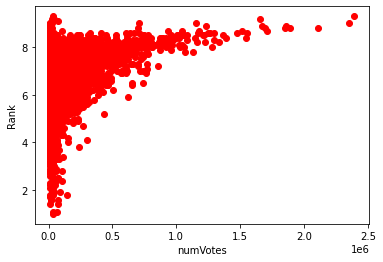

In [99]:
plt.scatter(votes_10k["numVotes"],votes_10k["averageRating"],color = "r")
plt.xlabel("numVotes")
plt.ylabel("Rank")
plt.show()

# Using Tornado Templates, draw a bar graph of the number of movies by year since 1900


In [100]:
movies_since_1900 = movies[movies['startYear'] >= 1900]
movies_since_1900

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
340,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.5,8
374,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.1,635
383,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,5.2,6
398,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama,4.5,14
406,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama,3.8,12
...,...,...,...,...,...,...,...,...,...,...,...
1153783,tt9916190,movie,Safeguard,Safeguard,0,2020,\N,90,"Action,Adventure,Thriller",3.5,139
1153789,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,\N,84,Thriller,5.8,1056
1153792,tt9916362,movie,Coven,Akelarre,0,2020,\N,92,"Adventure,Drama,History",6.3,3255
1153795,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,\N,\N,"Adventure,History,War",3.8,12


In [101]:
movies_count = movies_since_1900.groupby(['startYear']).count()
movies_count

,tconst,titleType,primaryTitle,originalTitle,isAdult,endYear,runtimeMinutes,genres,averageRating,numVotes
startYear,,,,,,,,,,
1900,2,2,2,2,2,2,2,2,2,2
1901,1,1,1,1,1,1,1,1,1,1
1902,1,1,1,1,1,1,1,1,1,1
1903,1,1,1,1,1,1,1,1,1,1
1904,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
2017,9712,9712,9712,9712,9712,9712,9712,9712,9712,9712
2018,9567,9567,9567,9567,9567,9567,9567,9567,9567,9567
2019,9255,9255,9255,9255,9255,9255,9255,9255,9255,9255


In [102]:
movies_count.reset_index(level=0, inplace=True)
movies_count

,startYear,tconst,titleType,primaryTitle,originalTitle,isAdult,endYear,runtimeMinutes,genres,averageRating,numVotes
0,1900,2,2,2,2,2,2,2,2,2,2
1,1901,1,1,1,1,1,1,1,1,1,1
2,1902,1,1,1,1,1,1,1,1,1,1
3,1903,1,1,1,1,1,1,1,1,1,1
4,1904,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
117,2017,9712,9712,9712,9712,9712,9712,9712,9712,9712,9712
118,2018,9567,9567,9567,9567,9567,9567,9567,9567,9567,9567
119,2019,9255,9255,9255,9255,9255,9255,9255,9255,9255,9255
120,2020,6382,6382,6382,6382,6382,6382,6382,6382,6382,6382


In [103]:
def bar_graph(x, y, img, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(img, transparent=True, bbox_inches='tight')
    plt.show()
    img.seek(0)

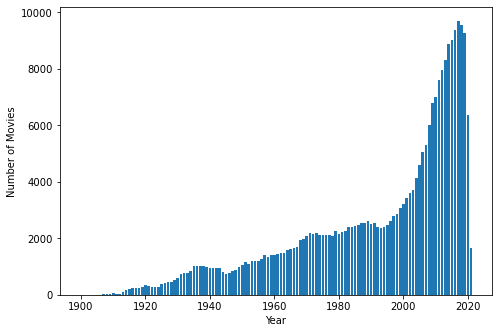

In [104]:
img = io.BytesIO()
bar_graph(movies_count['startYear'], movies_count['titleType'], img, "Year", "Number of Movies")
res = base64.b64encode(img.read()).decode("UTF-8")
with open("imdb_bargraph.html", "w") as file:
    file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(res))

# Convert these files into PDF without using a browser

In [105]:
client = pdfcrowd.HtmlToPdfClient('demo', 'ce544b6ea52a5621fb9d55f8b542d14d')
client.convertFileToFile('imdb_bargraph.html', 'imdb_bargraph.pdf')